# Software defects EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This dataset is from Kaggle: https://www.kaggle.com/competitions/playground-series-s3e23/data

In [5]:
data = pd.read_csv('../../data/raw/software_defect.csv')

In [6]:
data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


The first column _id_ will be removed

In [7]:
data.shape

(101763, 23)

Attribute Information:
 	
- loc             :  McCabe's line count of code
- v(g)            :  McCabe "cyclomatic complexity"
- ev(g)           :  McCabe "essential complexity"
- iv(g)           : McCabe "design complexity"
- n               : Halstead total operators + operands
- v               :Halstead "volume"
- l               : Halstead "program length"
- d               : Halstead "difficulty"
- i               : Halstead "intelligence"
- e               : Halstead "effort"
- b               : Halstead 
- t               : Halstead's time estimator
- lOCode          : Halstead's line count
- lOComment       : Halstead's count of lines of comments
- lOBlank         : Halstead's count of blank lines
- lOCodeAndComment: 
- uniq_Op         : unique operators
- uniq_Opnd       :  unique operands
- total_Op        :  total operators
- total_Opnd      :  total operands
- branchCount     :  of the flow graph
- defects  **(Target)**       : reported defects (False=0, True=1; i.e., defects=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [9]:
data.isna().sum().sum()

0

There aren't missing values.

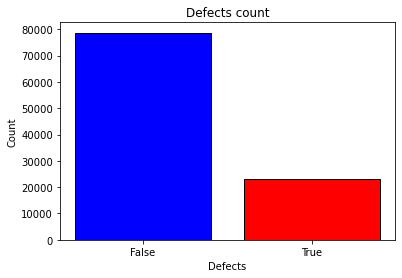

In [15]:
counts = data.defects.value_counts()

plt.bar(['False', 'True'], counts, color=['blue', 'red'], edgecolor='black') 
plt.title('Defects count')
plt.xlabel('Defects')
plt.ylabel('Count')
plt.show()

In [22]:
print('We have ' + str(counts[0]) + ' samples without defects and ' + str(counts[1]) + ' with defects. In other words, ' + str(round(100*counts[0]/counts.sum(),2)) + 
         '% of the softwares are correct and ' + str(round(100*counts[1]/counts.sum(), 2)) + '% are defective.') 

We have 78699 samples without defects and 23064 with defects. In other words, 77.34% of the softwares are correct and 22.66% are defective.


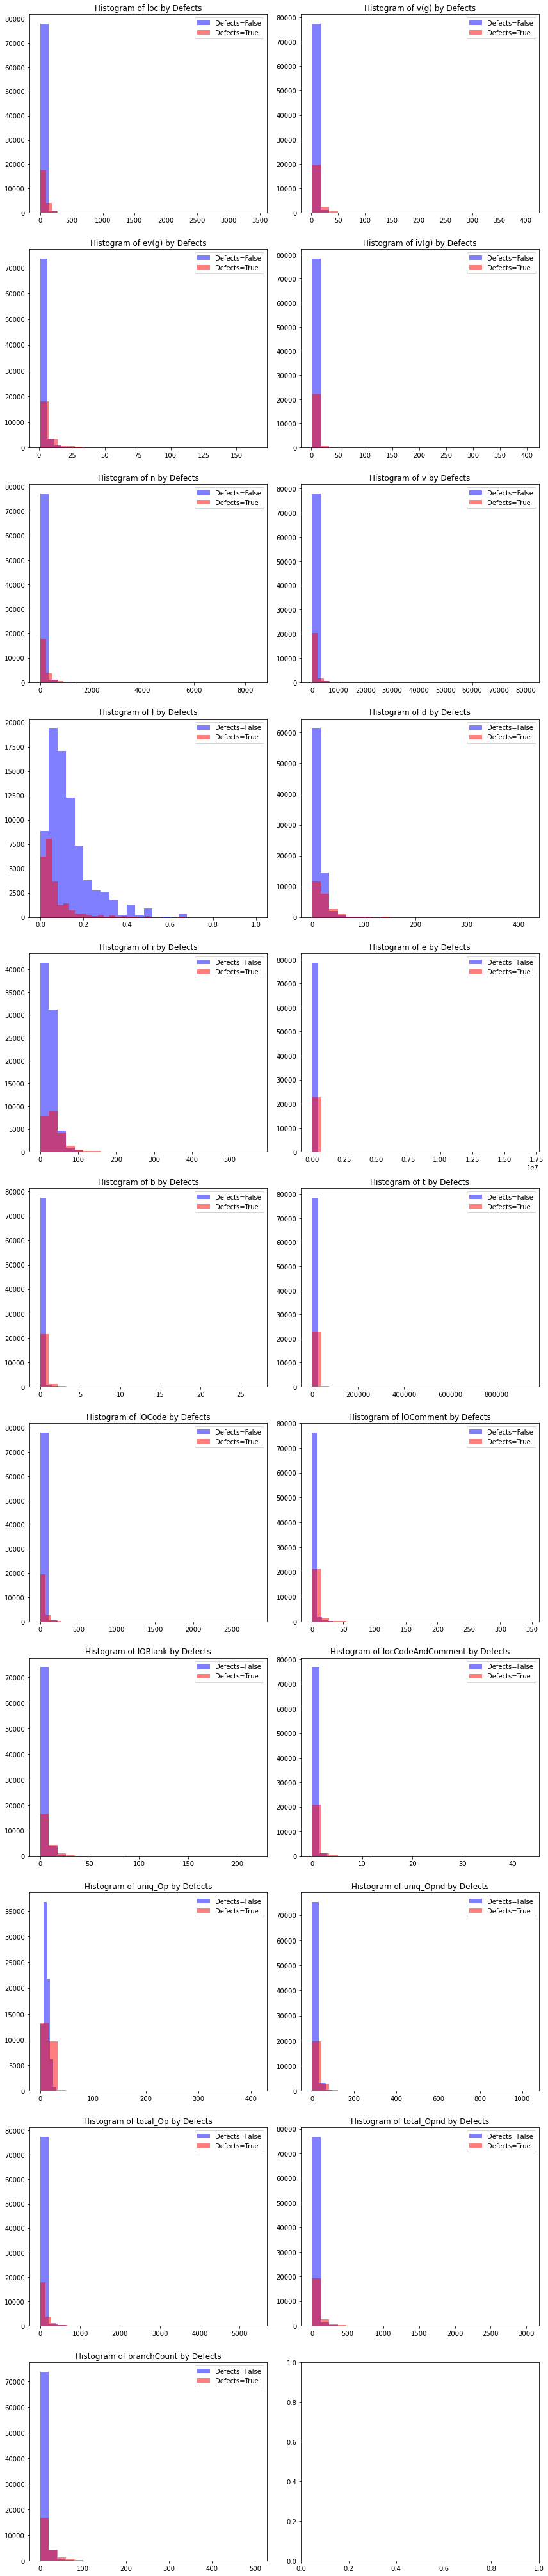

In [42]:
fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(12, 56))
axs = axs.flatten()

for i, col in enumerate(data.columns.drop(['id','defects'])):
    axs[i].hist(data.loc[data['defects'] == 0][col], color='blue', alpha=0.5, bins=25)
    axs[i].hist(data.loc[data['defects'] == 1][col], color='red', alpha=0.5, bins=25)
    axs[i].set_title(f'Histogram of {col} by Defects')
    axs[i].legend(['Defects=False', 'Defects=True'])
    
plt.tight_layout()
plt.show()

Apparently there isn't a variable such that makes a remarkable difference between groups.